# Numerical integrals

What about when we cannot integrate a function analytically? In other words, when there is no (obvious) closed-form solution. In these cases, we can use **numerical methods** to solve the problem.

Let's use this problem:
\begin{align}
\frac{dy}{dx} &= e^{-x^2} \\
y(x) &= \int e^{-x^2} dx + C
\end{align}

(You may recognize this as leading to the error function, $\text{erf}$:
$\frac{1}{2} \sqrt{\pi} \text{erf}(x) + C$,
so the exact solution to the integral over the range $[0,1]$ is 0.7468.)

In [19]:
# import libraries for numerical functions and plotting
import numpy as np
import matplotlib.pyplot as plt

In [20]:
# these lines are only for helping improve the display
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('pdf', 'png')
plt.rcParams['figure.dpi']= 300
plt.rcParams['savefig.dpi'] = 300

We'll create a function representing the derivative to be integrated, for convencience, and plot it to see its shape:

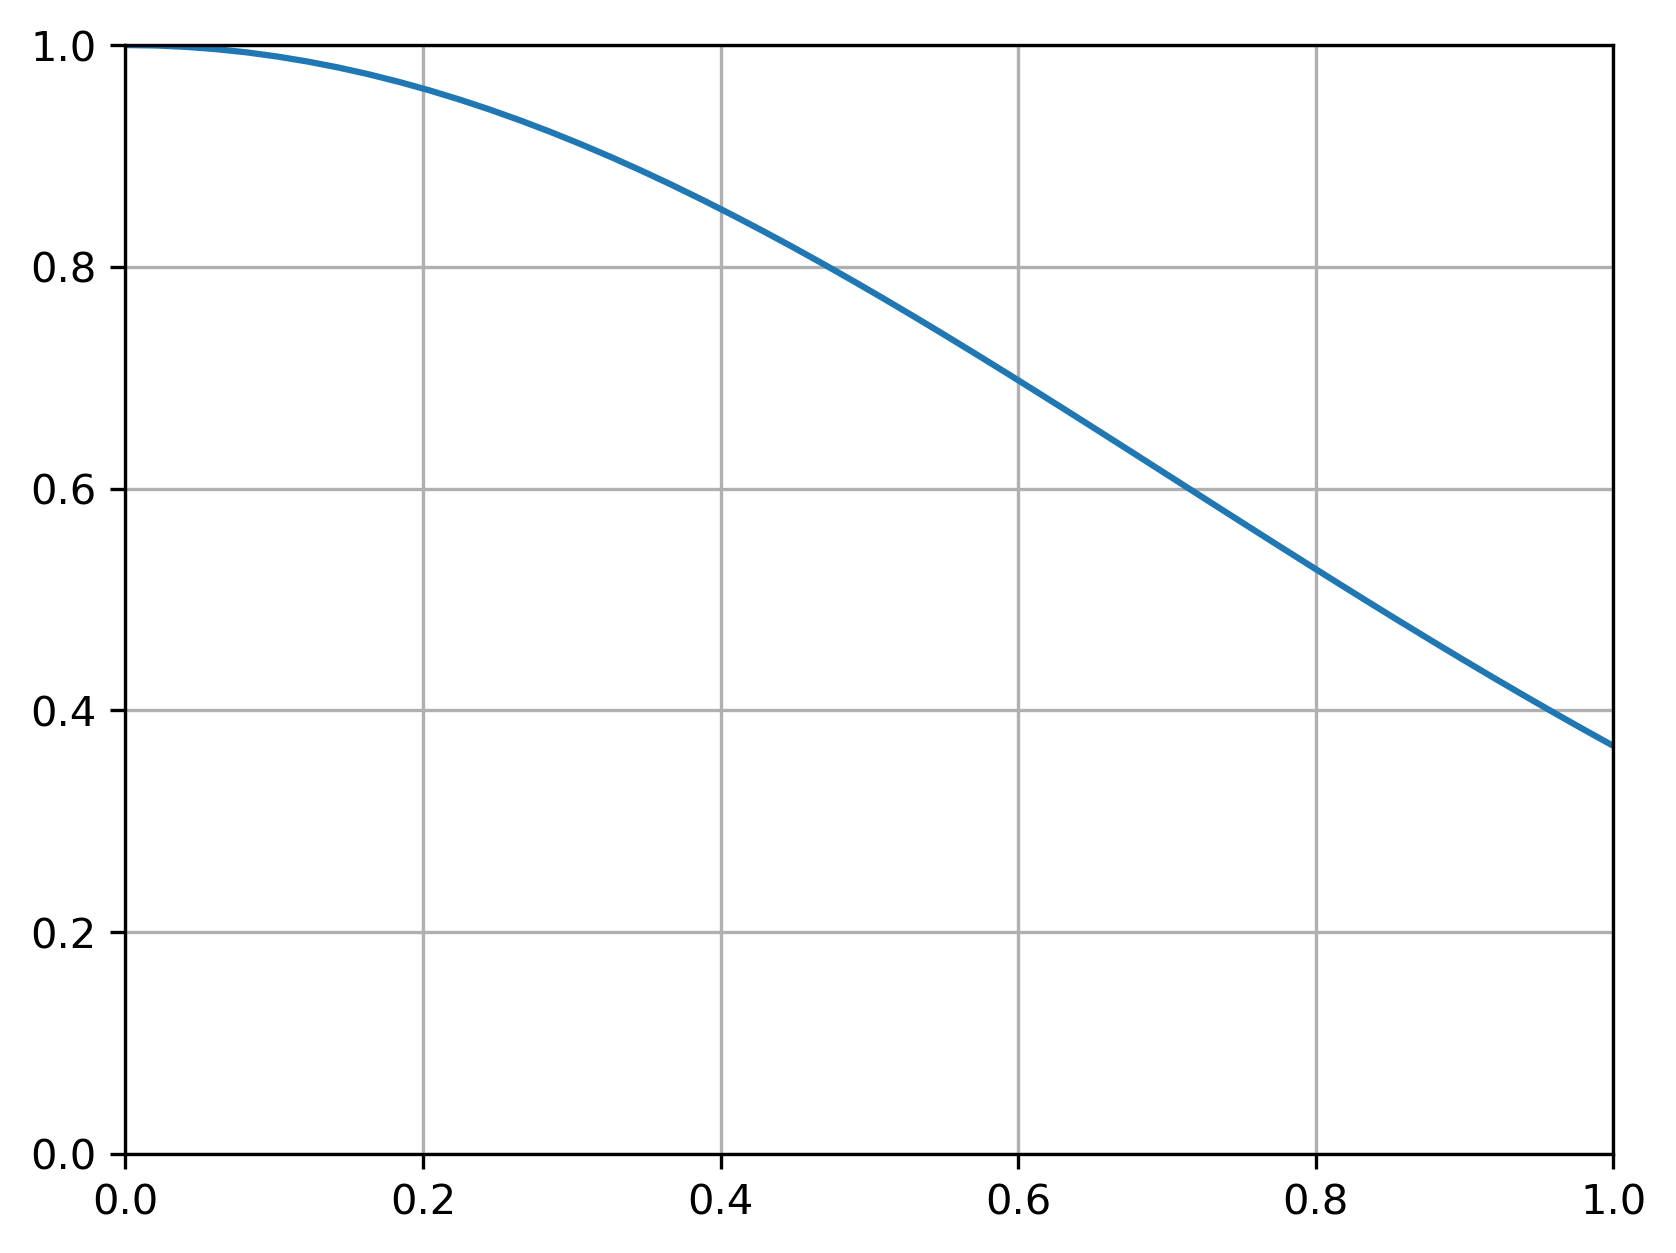

In [21]:
def func(x):
    '''Function to be integrated'''
    return np.exp(-x**2)

x_vals = np.linspace(0, 1)

plt.plot(x_vals, func(x_vals))
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.grid(True)
plt.show()

Alternatively, we could create an inline function, using the `lambda` keyword in Python. We can do this with the syntax:

```python
[function name] = lambda [parameters]: expression
```
where multiple parameters would be separated by a comma like `lambda x,y: expression`.

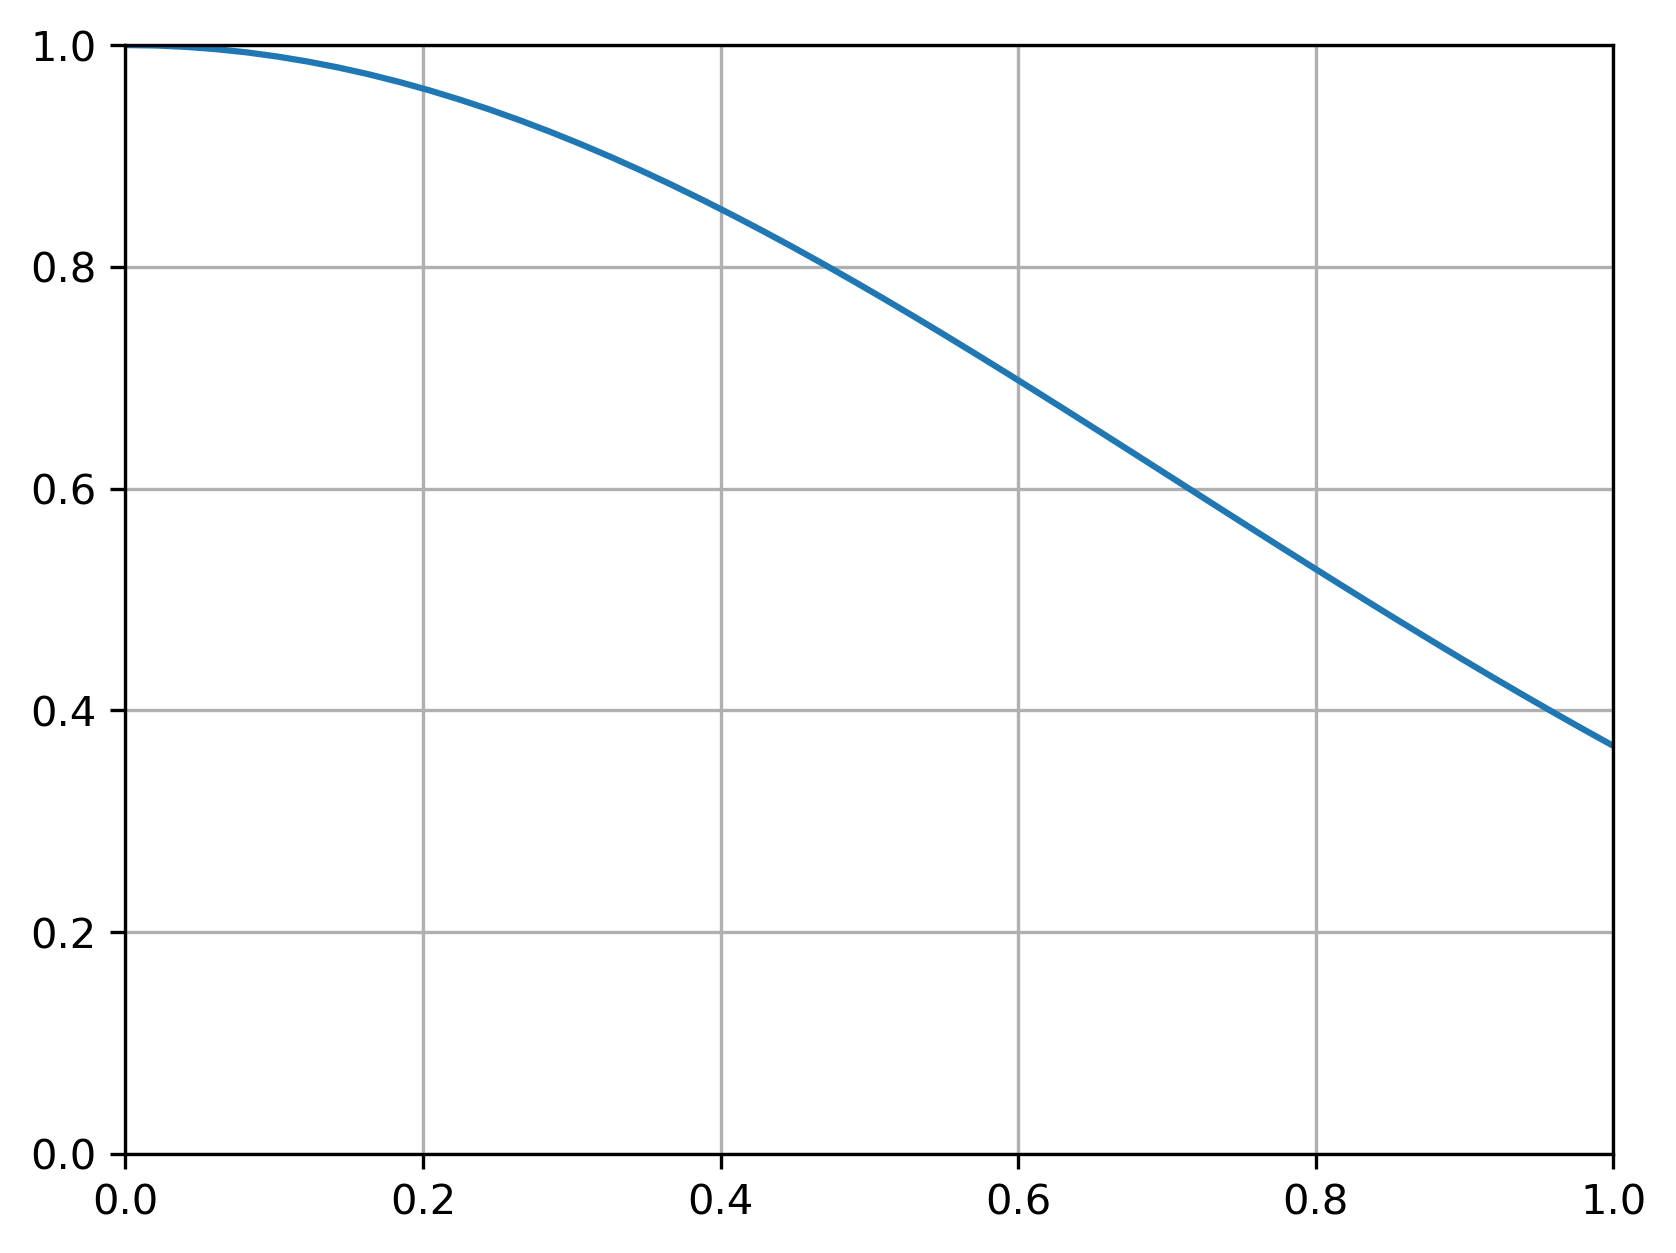

In [23]:
# function to be integrated
func = lambda x: np.exp(-x**2)

x_vals = np.linspace(0, 1)

plt.plot(x_vals, func(x_vals))
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.grid(True)
plt.show()

## Numerical integration: Trapezoidal rule

In such cases, we can find the integral by using the **trapezoidal rule**, which finds the area under the curve by creating trapezoids and summing their areas:
\begin{equation}
\text{area under curve} = \sum \left( \frac{f(x_{i+1}) + f(x_i)}{2} \right) \Delta x
\end{equation}

Let's see what this looks like with four trapezoids ($\Delta x = 0.25$):

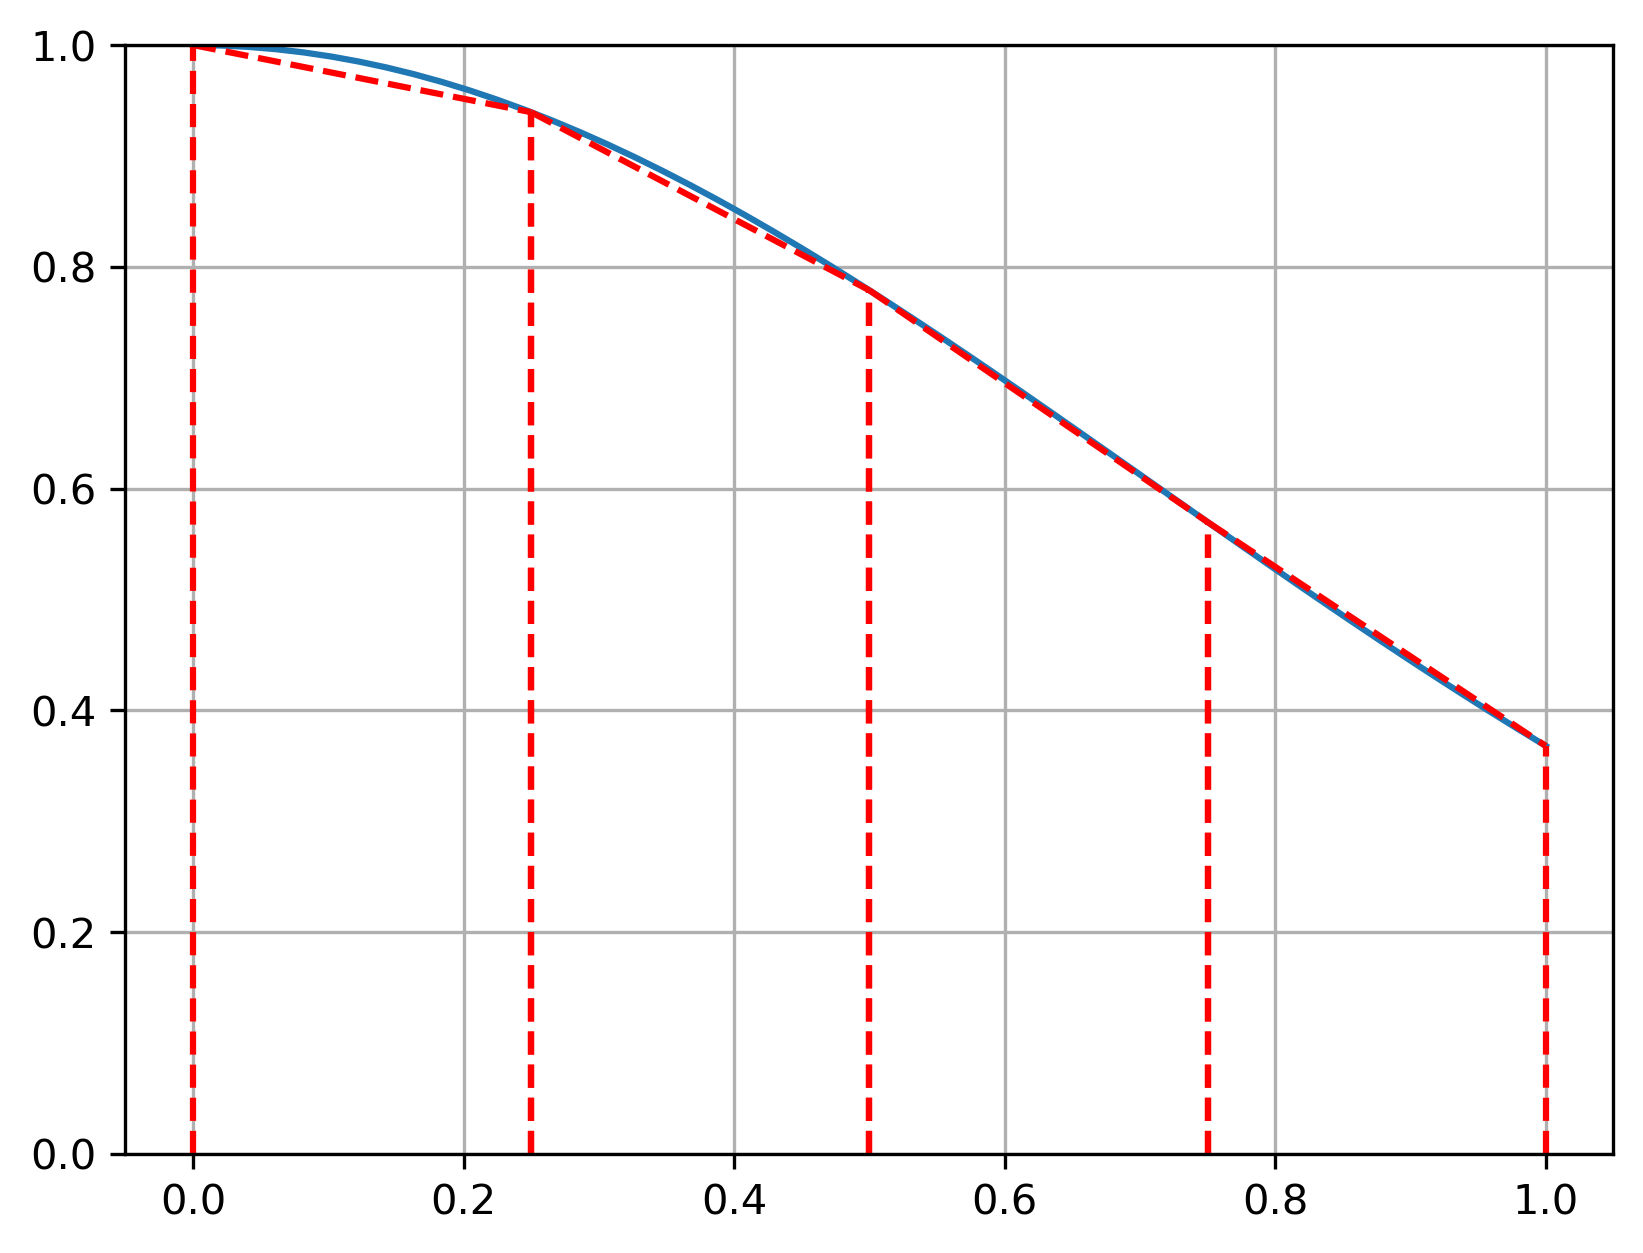

In [6]:
x_vals = np.linspace(0, 1)
plt.plot(x_vals, func(x_vals))

# when using arange(), we need to specify an upper limit just above
x_vals = np.arange(0, 1.01, 0.25)

# plot the trapezoids
for x1, x2 in zip(x_vals[:-1], x_vals[1:]):
    plt.plot([x1, x1], [0, func(x1)], 'r--')
    plt.plot([x2, x2], [0, func(x2)], 'r--')
    plt.plot([x1, x2], [func(x1), func(x2)], 'r--')

plt.ylim(0, 1)
plt.grid(True)
plt.show()

Now, let's integrate using the trapezoid formula given above:

In [10]:
dx = 0.1
x_vals = np.arange(0, 1.01, dx)

# this needs to have an even number of points

area = 0.0
for x1, x2 in zip(x_vals[:-1], x_vals[1:]):
    area += (dx/2) * (func(x1) + func(x2))

area_exact = 0.5 * np.sqrt(np.pi) * np.math.erf(1)
    
print(f'Numerical integral: {area: .6f}')
print(f'Exact integral: {area_exact: .6f}')
print(f'Error: {100 * np.abs(area_exact-area)/area_exact: .4f}%')

Numerical integral:  0.746211
Exact integral:  0.746824
Error:  0.0821%


We can see that using the trapezoidal rule, a numerical integration method, with an internal size of $\Delta x = 0.1$ leads to an approximation of the exact integral with an error of 0.08%.

You can make the trapezoidal rule more accurate by:

- using more segments (that is, a smaller value of $\Delta x$, or
- using higher-order polynomials (such as with Simpson's rules) over the simpler trapezoids.

First, how does reducing the segment size (step size) by a factor of 10 affect the error?

In [11]:
dx = 0.01
x_vals = np.arange(0, 1.01, dx)

# this needs to have an even number of points

area = 0.0
for x1, x2 in zip(x_vals[:-1], x_vals[1:]):
    area += (dx/2) * (func(x1) + func(x2))

area_exact = 0.5 * np.sqrt(np.pi) * np.math.erf(1)
    
print(f'Numerical integral: {area: .6f}')
print(f'Exact integral: {area_exact: .6f}')
print(f'Error: {100 * np.abs(area_exact-area)/area_exact: .4f}%')

Numerical integral:  0.746818
Exact integral:  0.746824
Error:  0.0008%


So, reducing our step size by a factor of 10 (using 100 segments instead of 10) reduced our error by a factor of 100!

## Numerical integration: Simpson's rule

We can increase the accuracy of our numerical integration approach by using a more sophisticated interpolation scheme with each segment. In other words, instead of using a straight line, we can use a polynomial. **Simpson's rule**, also known as Simpson's 1/3 rule, refers to using a quadratic polynomial to approximate the line in each segment.

Simpson's rule defines the definite integral for our function $f(x)$ from point $a$ to point $b$ as
\begin{equation}
\int_a^b f(x) \approx \frac{1}{6} \Delta x \left( f(a) + 4 f \left(\frac{a+b}{2}\right) + f(b) \right)
\end{equation}
where $\Delta x = b - a$.

That equation comes from interpolating between points $a$ and $b$ with a third-degree polynomial, then integrating by parts.

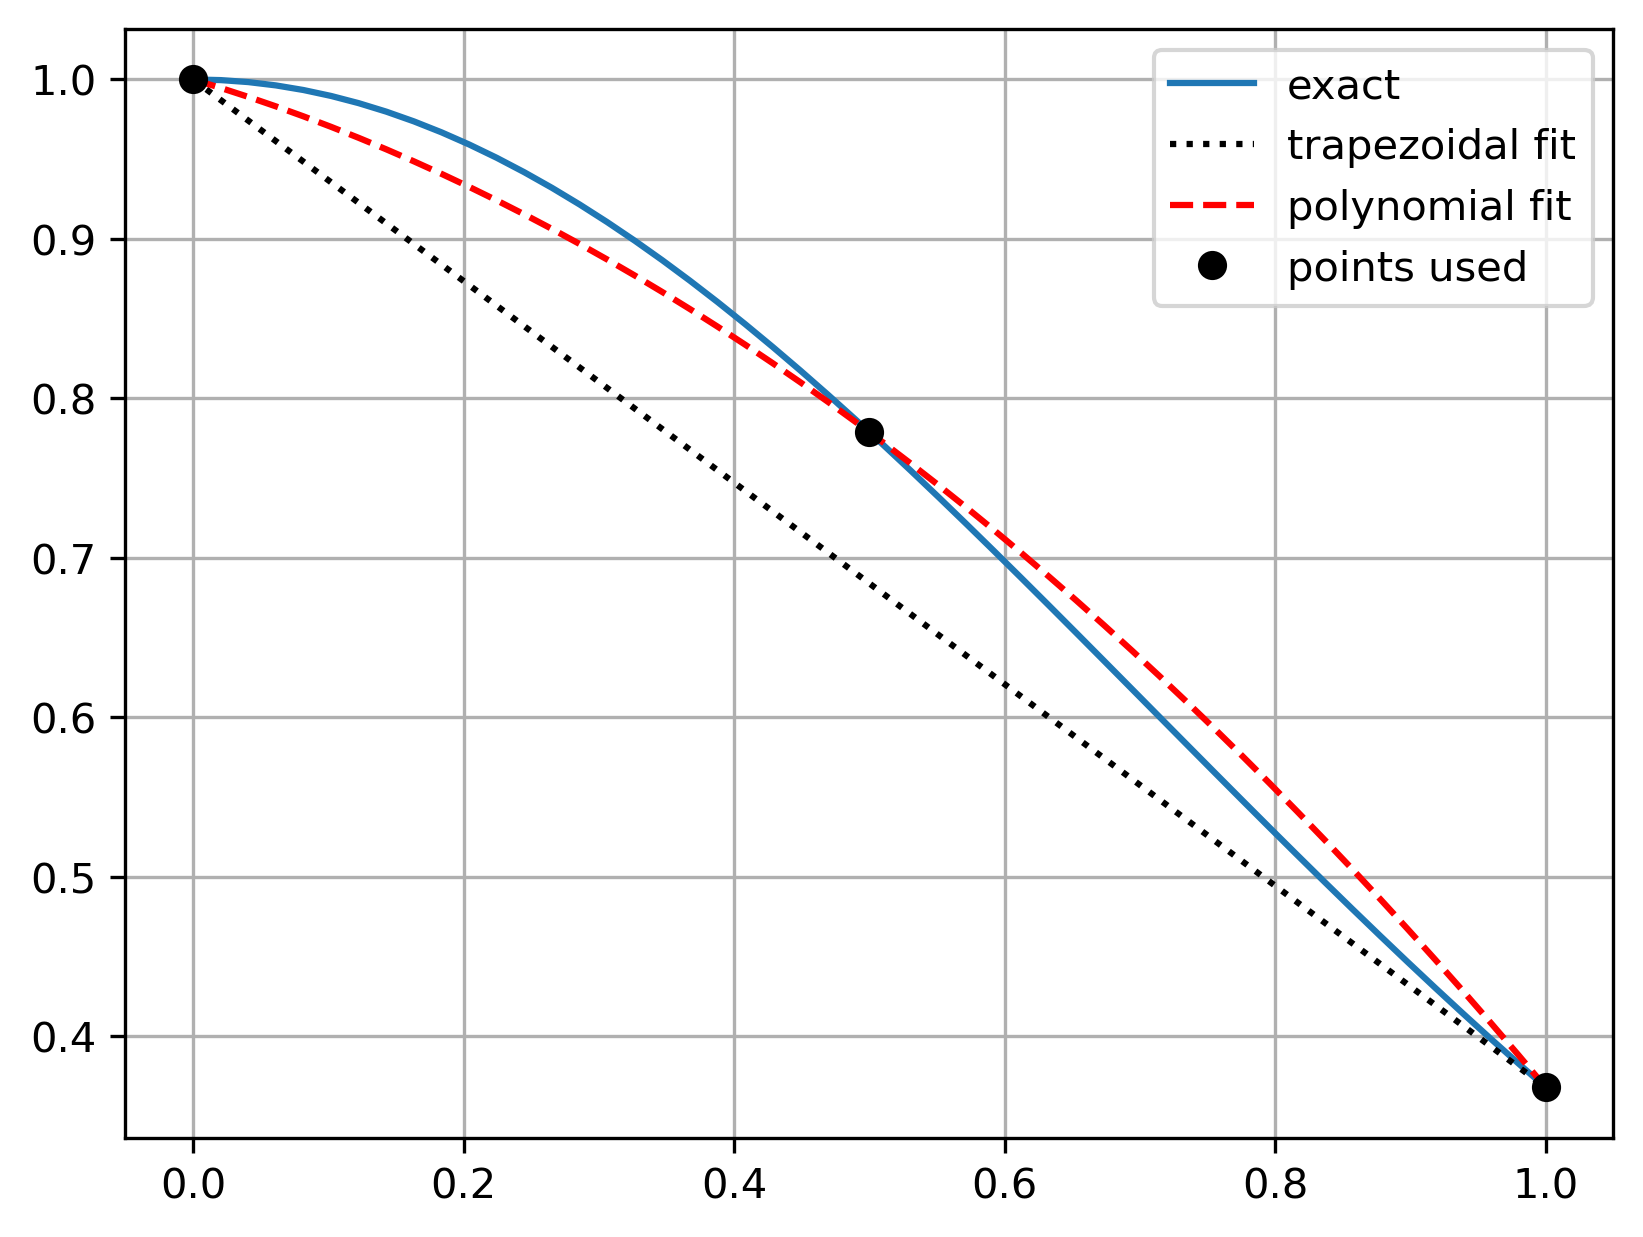

In [17]:
x_vals = np.linspace(0, 1)
plt.plot(x_vals, func(x_vals), label='exact')

y_trap = np.linspace(func(0), func(1))
plt.plot(x_vals, y_trap, 'k:', label='trapezoidal fit')

# quadratic polynomial
a = 0
b = 1
m = (b - a) / 2
poly = lambda z: (
    func(a)*(z - m)*(z - b)/((a - m)*(a - b)) + 
    func(m)*(z - a)*(z - b)/((m - a)*(m - b)) +
    func(b)*(z - a)*(z - m)/((b - a)*(b-m))
    )
plt.plot(x_vals, poly(x_vals), 'r--', label='polynomial fit')

x_points = [0, 0.5, 1]
y_points = [func(0), func(m), func(1)]
plt.plot(x_points, y_points, 'ok', label='points used')

plt.grid(True)
plt.legend()
plt.show()

We can see that the polynomial fit, used by Simpson's rule, does a better job of of approximating the exact function, and as a result Simpson's rule will be more accurate than the trapezoidal rule.

Next let's apply Simpson's rule to perform the same integration as above:

In [18]:
dx = 0.1
x_vals = np.arange(0, 1.01, dx)
# this needs to have an even number of points

area = 0.0
for x1, x2 in zip(x_vals[:-1], x_vals[1:]):
    area += (dx/6) * (
        func(x1) + 4*func(0.5*(x1 + x2)) + func(x2)
        )

area_exact = 0.5 * np.sqrt(np.pi) * np.math.erf(1)
    
print(f'Numerical integral (Simpson rule): {area: .6f}')
print(f'Exact integral: {area_exact: .6f}')
print(f'Error: {100 * np.abs(area_exact-area)/area_exact: .6f}%')

Numerical integral (Simpson rule):  0.746824
Exact integral:  0.746824
Error:  0.000007%


Simpson's rule is about three orders of magnitude (~1000x) more accurate than the trapezoidal rule.

In this case, using a more-accurate method allows us to significantly reduce the error while still using the same number of segments/steps.